In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Phong Shading Calc
def phong_shading(N,L,V,R,ka,kd,ks,la,ld,ls,shininess):
  ambient = ka*la
  diffuse = kd*ld*np.dot(N,L)
  specular = ks*ls*np.dot(N,R)**shininess
  return ambient + diffuse + specular

# Vector pháp tuyến
N = np.array([0,0,1])
L = np.array([1,1,1])
V = np.array([0,0,1])
R = 2*N*np.dot(N,L)-L

# Tham số Phong
ka,kd,ks = 0.1, 0.7, 0.5
la,ld,ls = 1,1,1
shininess = 32

# Calculate ánh sáng result
light_intensity = phong_shading(N,L,V,R,ka,kd,ks,la,ld,ls,shininess)

print(light_intensity)

1.2999999999999998


In [3]:
# Các thành phần
def ambient_light(ka,color,shape):
  # Tạo ánh sáng môi trường
    return ka*color*np.ones(shape+ (3,))


In [4]:
# Tạo lưới điểm
x = np.linspace(-1,1,100)
y = np.linspace(-1,1,100)
X,Y = np.meshgrid(x,y)
z = np.sqrt(np.maximum(1-X**2 - Y**2,0))
normal = np.dstack((X,Y,z))

In [5]:
def specular_light(ks,light_dir,view_dir,normal,shininess):
    # Tính as phản xạ
    reflect_dir = 2 * normal * np.sum(normal * light_dir, axis=2, keepdims=True) - light_dir
    # Calculate the dot product of normal and light_dir, sum over the last axis to get a (100, 100, 1) shape, and then perform the reflection calculation.
    spec = np.power(np.maximum(np.dot(reflect_dir, view_dir), 0), shininess)
    # Calculate the dot product between reflect_dir and view_dir without using axis argument.
    return ks * spec[..., np.newaxis] * np.ones(3) # Giả sử trường hợp as trắng

In [6]:
def diffuse_light(kd,color,light_dir,normal):
  diff = np.maximum(np.dot(normal, light_dir),0)
  return kd * diff[...,np.newaxis]*color

In [7]:
# CHuẩn hóa vector
norm_length = np.linalg.norm(normal,axis=2,keepdims=True)
normal = normal/norm_length

In [8]:
# Tham số ánh sáng và quan sát
light_pos = np.array([10,10,10])
view_pos = np.array([0,0,10])
light_dir = light_pos / np.linalg.norm(light_pos)
view_dir = view_pos / np.linalg.norm(view_pos)

In [9]:
# Hệ số Phong
ka,kd,ks = 0.1,0.7,0.2
shininess = 32
object_color = np.array([0,0,1])

In [10]:
# Tính các thành phần as
shape = normal.shape[:2]
ambient_component = ambient_light(ka,object_color,shape)
diffuse_component = diffuse_light(kd,object_color,light_dir,normal)
specular_component = specular_light(ks,light_dir,view_dir,normal,shininess)
phong_component = ambient_component + diffuse_component + specular_component


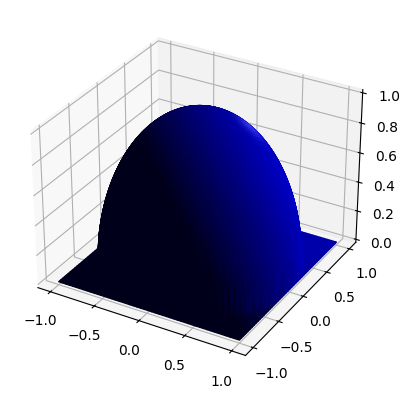

In [11]:
# Vẽ hình Phong model
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,z,facecolors=phong_component,shade=False)